# Линейная регрессия

Всем привет. В данном уроке мы разбирем такую тему как линейная регрессия. 

Мы рассмотрим какие виды проблем решает линейная регрессия. А также, мы поговорим про то, как можно использовать математеку для решения этих проблем. 

В этом уроке мы подробно разберем что такое линейные функции, функция потерь, производная и поговорим про один из самый популярный и самых полезный алгорим машинного обучения - градиентный спуск.

Но просто рассматривать теорию без реализации не слишком полезно. Поэтому мы также реализуем все эти функции и алгоритмы на Python и NumPy.

***Почему мы изучаем линейную регрессию, а не глубокие нейронные сети?*** 

Многие из вас наверняка уже слышали про линейную регрессию в университете или в даже в школе. И сейчас вы задаетесь вопросом: а почему мы будем изучать ее, а не что-то что сейчас на слуху, например, нейронные сети. 

Во-первых, линейная регрессия довольно простая для понимания, но при этом, идеи которые мы сегодня рассмотрим на примере линейной регрессии повсеместно применяются в машинном обучении. Например, алгоритм который используется для обучения линейной регрессии также используется и в нейронных сетях.

Во-вторых, пускай линейная регрессия и является довольно старой идеей, она до сих применяется для решения многих зачадах. Она встроена во многие базы данных, такие как ClickHouse и даже доспупна в Excel.

### Постановка задачи (доделать)

Давайте представим что к нам пришла фирма, которая хочет по Х определять У. У них есть несколько примеров данных где есть пары х и у. 

То есть, наша задача найти зависимость между Х и У. 


То есть, нужно найти функцию $f(X) = y$, где $X$ это , а $y$ это. В общем случаее это и есть задача регрессии.

Можно представить что эти пары (x, y) - это значения функции $f(X)$ в точках $Х$. И задача регрессии это построить функцию (некую линию) которая может *описать* эти данные. 

Например: 

*нам говорят, у Х=0.1. Мы берем это число, помещаем ее нашу функцию и получаем значение для у.* 

$f(0.1) = 0.3$

*И мы говорим в ответ: у=0.3.*

*Другой пример регрессии.* У нас есть интернет сайт и мы хотим предсказать сколько посититлей у нас будет в в определенное время, при этом у нас есть статистика посещений сайта от времени. Наша задача - используя имеющиеся данные о загруженности в прошлом, предсказать количество поситителей в интересующиее нас время. 

То есть по имеющимся данным построить зависимость интересующией нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

Рассмотрим подробнее пример с Х и У.

Давайте загрузим данные. Для этого воспользуемся функциями которые я подготовил специально для этого урока. 

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


В первой строчке мы подгрузим все вспомогательные функции, которые мы сегодня будем применять. 

Вторая строчка подгужает библиотеку NumPy, c помощью которой мы будем сегодня реализовывать все алгоримты. 

В третьей строки мы загрузим данные.

In [22]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

После этого в векторе $X$, а в векторе $y$. 

А теперь давайте посмотрим на эти данные.

In [23]:
visualize_Xy(X, y)    

    Значение X  Значение Y
0         0.10        0.13
1         0.12        0.22
2         0.13        0.13
3         0.13        0.18
4         0.14        0.17
5         0.18        0.21
6         0.21        0.21
7         0.26        0.20
8         0.26        0.21
9         0.26        0.21
10        0.28        0.25
11        0.29        0.26
12        0.29        0.19
13        0.35        0.31
14        0.35        0.30
15        0.43        0.35
16        0.46        0.34
17        0.47        0.38
18        0.48        0.35
19        0.48        0.31


$X$ и $y$ - это массивы NumPy ndarray с 20 элементами. 

Выведим тип $X$ и тип $y$.

In [24]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Ну давайте тогда и на значения посмотрим.

Значения массива X:

In [25]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Значения массива y:

In [26]:
print(y)

[0.13 0.22 0.13 0.18 0.17 0.21 0.21 0.2  0.21 0.21 0.25 0.26 0.19 0.31
 0.3  0.35 0.34 0.38 0.35 0.31]


И давайте договоримся, что когда я буду писать $X_i$ в тексте - это будет эквивалентну обращению к $i$-тому элемента массива $X$. Или тоже самаое что ***X[i]*** в коде.

In [27]:
print(X[0])

0.1


Как можно заметить, значение $X[0]$ равно значению нулеговго элемента X, выведенного выше.

Отобразим эти данные на графике. Черные точки - это пары х, у.

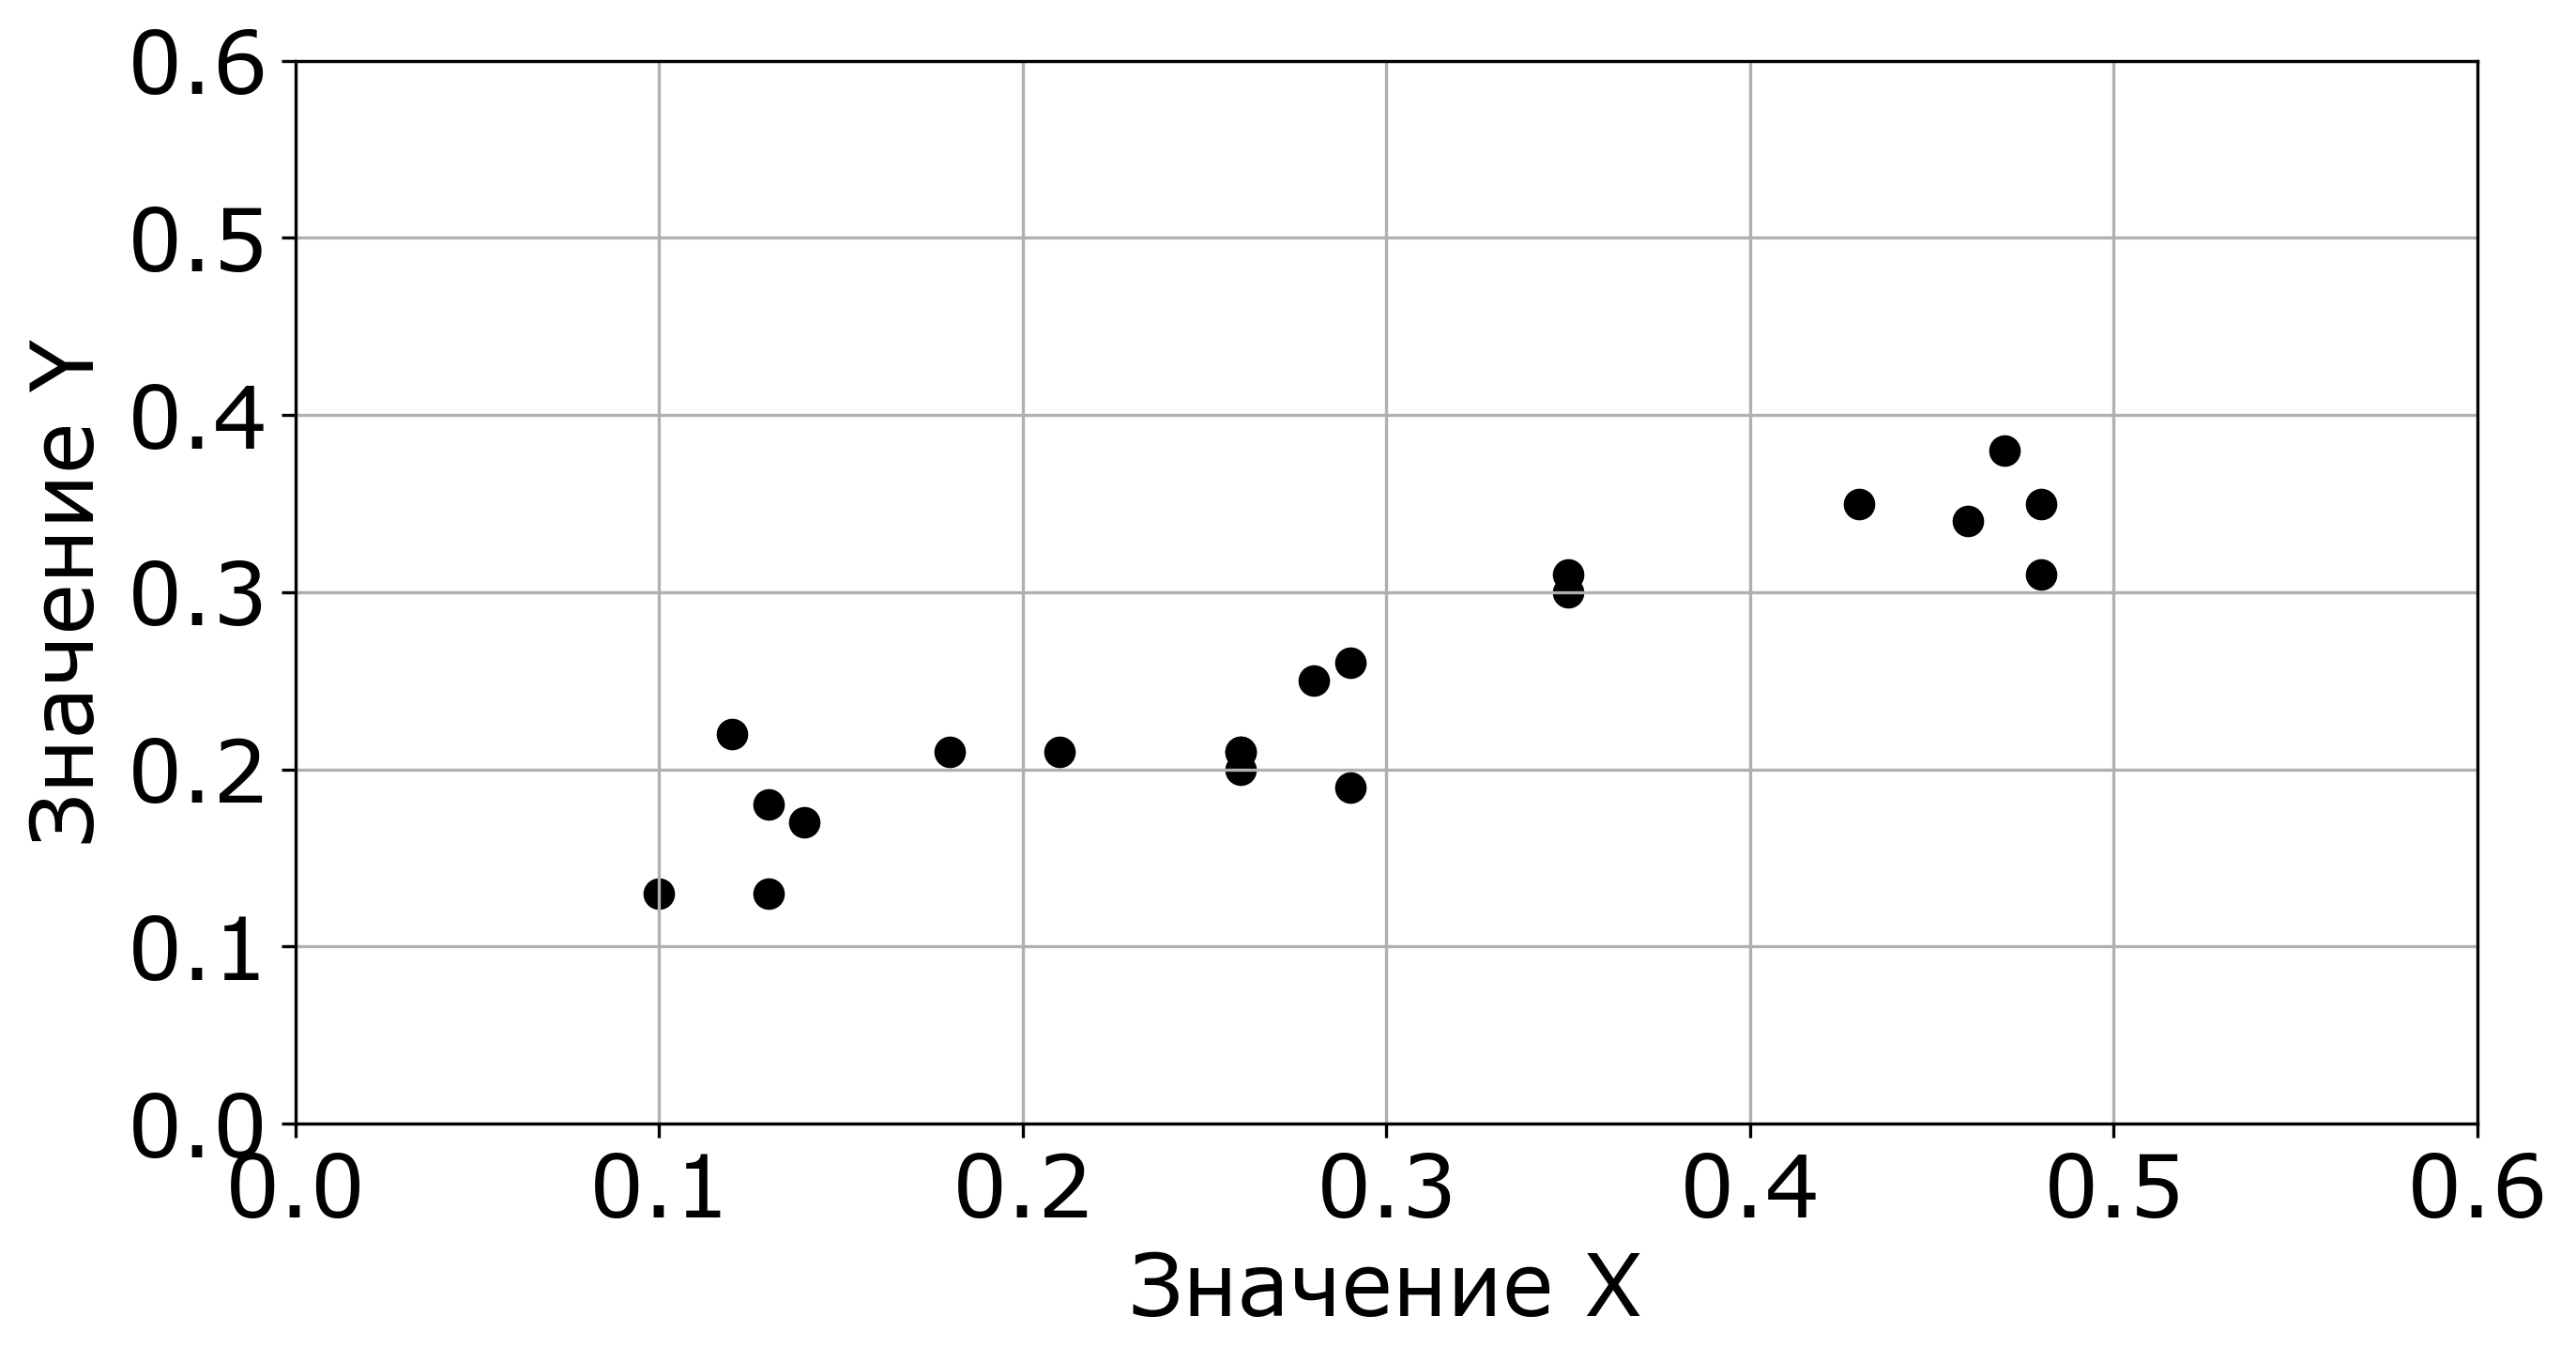

In [28]:
plot_data(X, y)      # Строим диаграму с точками

Видим, что чем больше Х, тем выше Y. Можно сделать вывод, что между этими данными есть зависимость.

А еще можно заметить что точки примерно лежат на одной воображаемой линии.

Это позволяет нам предположить, что данная зависимость может описаться линейной функцией вида:

$y = kX$, 

где $X$ это, а $y$, $k$ - коэффициент. Также $k$ можно называть параметром функции и весом функции.

Давайте посмотрим как выглядят функции вида $y = kX$ с разными коэффициентами $k$. 

Двигая слайдер можно менять значение коэффициента. Черные точки это наши данные. Ну а черная линяя - это функиция $y=kX$ с различными значения $k$.

Как видно по графику, наша функиция $y=kX$ это линия. Ну а сам такой вид функции называтеся линейной функцией.

In [29]:
choose_slope(X, y)

interactive(children=(FloatSlider(value=0.1, description='k', max=2.0), Output()), _dom_classes=('widget-inter…

График - это конечно хорошо. Нам нужно как-то применять эту фунцию для предсказания значений.

Давайте реализуем линейню функцию на Python.

Небольшая ремарка. 

Перед каждой ячейкой с кодом будет текст с задачей, которая решает этот код и описание выходных и выходных данных.

Самая простая реализация линейной функции в самом простом виде выглядит так:

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i$.

* На входе массив ndarray $X$

* На выходе массив ndarray со значениями ndarray$f(x)$

In [30]:
def dummy_f(X, k):
    # Создаем результурующий список, где будем сохранять значения функции
    result = []                  
    
    # Перменная i в цикле будет менять свое значение в диапозоне (range) от 0 до размема массива X (len(X))
    for i in range(len(X)):    
        
        # Считаем значени y для i-этого элемента массива X
        y_i = k*X[i]    
        
        # Записываем результат в список
        result.append(y_i)
        
    # Создаем из списка массив ndarray        
    return np.array(result)

print(dummy_f(X, k=1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Но это не самая лучшая реализация. 

Можно воспользоватся возможностями NumPy. Из предыдущего урока по NumPy мы знаем что в нем есть опирация умножения массива на скаляр. Давайте ей воспользуемся

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i$.

* На входе массив ndarray $X$

* На выходе массив ndarray со значениями ndarray$f(x)$

In [68]:
def f(X, k):
    # Используем возможность ndarray и умножаем массив X на скаляр k
    # Результат этой операции это ndarray
    return k*X

print(f(X=X, k=1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Эта функиця выгдядит очень комактно и можно заметить что рузультаты совершенно одинаковы.

При этом, эта функция также работает и для одного элемента.

In [32]:
print(f(X=X[0], k=100))

10.0


Функция не только выгдядет проще и компактнее, но также она и во много раз быстрее.

Разница во времени выполнения функций dummy_f и f на массиве ndarray с 100000 элементов.

Функция                | Среднее время (микросекунд) 
-----------------------|-----------------------------
dummy_f     | 31400                       
f                      | 70                          

Как видно из таблицы, функция написанная с помощью NumPy быстрее в 500 раз!

### Функция ошибки

Ок. Мы научились реализовывать линейню функцию для различных k. Но это нам не отвечает на вопрос о том, какое $k$ подходит нам лучше всего.

Давайте снова посмотрим на различные линейные функции с различными $k$.

In [33]:
choose_slope(X, y)

interactive(children=(FloatSlider(value=0.1, description='k', max=2.0), Output()), _dom_classes=('widget-inter…

У нас есть линейные фунции с различными $k$. Но как определить какая из них лучшая? И желательно сделать это так, что бы это можно было запрограммировать.

Для это введем **функцию ошибку**, также известную как **функцию потерь**. Функция ошибки - численное значение того, насколько хорошо наша функция описывает данные. Это то, насколько насколько предсказаные значения нашей функции отличаются от реальных.

Обозначается функция потерь как $Loss$, $L$ или $J$. Мы будем использовать $Loss$

Лучше всего не использовать значение $L$. $L$ - часто используется как обозначение для функции правдопадобия, которая часто используется в машинном обучении.

Давайте визуализируем разницу между точками которые предсказывает функция $f(X) = kX$ и реальными данными.

In [34]:
plot_data_and_error(X, y)

interactive(children=(FloatSlider(value=0.1, description='k', max=2.0), Output()), _dom_classes=('widget-inter…

Эту эту разницу можно использовать для оценки нашей функции $f(X) = kX$ и оценки параметра $k$.

Пусть у нас есть функция (наша модель):  

$\widetilde{y} = f(X) = kX$

То есть, $\widetilde{y}$ является предсказанными нами значениями для $X$. 

А настоящие значения будут равны $y$. 

Тогда ошибку нашего предсказания на $i$-ом примере $\widetilde{y}_i$ можно посчитать как: 

$error = \widetilde{y}_i - y_i$

Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль либо квадрат ошибки. Для начала давайте возьмем квадрат. О модуле мы поговорим во втором уроке регрессии. Тогда ошибка $loss(k)$ на $i$-ом примере будет равна:

$loss(k) = (\widetilde{y}_i - y_i)^2$

$loss(k) = (kX_i - y_i)^2$

Давайте посмотрим на значения ошибок для наших точек для коэффициента $k = 1$.

In [35]:
k = 1
error_on_sample(X, y, k)

Разница на примере 0 равна -0.03
Разница на примере 1 равна -0.1
Разница на примере 2 равна 0.0
Разница на примере 3 равна -0.05
Разница на примере 4 равна -0.03
Разница на примере 5 равна -0.03
Разница на примере 6 равна 0.0
Разница на примере 7 равна 0.06
Разница на примере 8 равна 0.05
Разница на примере 9 равна 0.05
Разница на примере 10 равна 0.03
Разница на примере 11 равна 0.03
Разница на примере 12 равна 0.1
Разница на примере 13 равна 0.04
Разница на примере 14 равна 0.05
Разница на примере 15 равна 0.08
Разница на примере 16 равна 0.12
Разница на примере 17 равна 0.09
Разница на примере 18 равна 0.13
Разница на примере 19 равна 0.17


Как можно заметить, в начале разница отрицательная, а в после 6-го примера она становиться положительной.

Давайте посмотрим на квадрат разности между предсказаными значение и реальным для коэффициента $k = 1$.

In [36]:
k = 1
quad_error_on_sample(X, y, k)

Квадрат разницы на примере 0 равен 0.0009
Квадрат разницы на примере 1 равен 0.01
Квадрат разницы на примере 2 равен 0.0
Квадрат разницы на примере 3 равен 0.0025
Квадрат разницы на примере 4 равен 0.0009
Квадрат разницы на примере 5 равен 0.0009
Квадрат разницы на примере 6 равен 0.0
Квадрат разницы на примере 7 равен 0.0036
Квадрат разницы на примере 8 равен 0.0025
Квадрат разницы на примере 9 равен 0.0025
Квадрат разницы на примере 10 равен 0.0009
Квадрат разницы на примере 11 равен 0.0009
Квадрат разницы на примере 12 равен 0.01
Квадрат разницы на примере 13 равен 0.0016
Квадрат разницы на примере 14 равен 0.0025
Квадрат разницы на примере 15 равен 0.0064
Квадрат разницы на примере 16 равен 0.0144
Квадрат разницы на примере 17 равен 0.0081
Квадрат разницы на примере 18 равен 0.0169
Квадрат разницы на примере 19 равен 0.0289


Тут у нас вся разница положительная.

Давайте посмотрим как это можно реализовать в коде.

In [37]:
k = 1
# f(X, k) возвращает массив ndarray
# y также массив ndarray
# И как мы помним из предыдущего урока, в NumPy реализована возможность поэлементной разности между массивами
errors = f(X, k) - y

print(errors)

[-0.03 -0.1   0.   -0.05 -0.03 -0.03  0.    0.06  0.05  0.05  0.03  0.03
  0.1   0.04  0.05  0.08  0.12  0.09  0.13  0.17]


Теперь, за счет того, что в NumPy есть возможность поэлементного возведение в квадрат, посчитать квадратичную разность не составит труда.

In [69]:
k = 1
quad_errors = (f(X, k) - y)**2
print(quad_errors)

[0.0009 0.01   0.     0.0025 0.0009 0.0009 0.     0.0036 0.0025 0.0025
 0.0009 0.0009 0.01   0.0016 0.0025 0.0064 0.0144 0.0081 0.0169 0.0289]


Мы научились оценивать ошибку предсказание на каждом примере. И у нас есть массив значений. Но хотелось бы иметь ровно одно число, которое даст оценку нашей функции. Сделать это довольно просто.

Мы можем посчитать среднюю ошибку $Loss(k)$ на всех примерах:

$\widetilde{y}_i = f(X_i) = kX_i$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(\widetilde{y}_i - y_i)^2}$ 

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это колличество примеров, $X_i$ - это , $y_i$ - для i-oй, $\widetilde{y}_i$ - предсказанная для i-oй .

***Немного про нотацию.*** 

Функция потерь формально зависит от входных данных, реальных выходных данных, вида функции и параметров этой функции. 

То есть, $Loss(X, y, f, k)$. Но обычно, для краткости, мы предполагаем, что мы используем текущие $X$, $y$ и $f$ и пишем, что функция потерь зависит только от параметров функции.

Давайте реализуем функцию ошибки.

Для входных данных массива $X$ и реального выходного значения $y$ необходимо реализовать функцию ошибки. 

На входе:

* Коэффициент $k$ функции $f(X)=kX$

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

На выходе:

* На выходе значение фуникции ошибки $Loss(k)$

Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

In [39]:
def loss_function(k, X, y):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    J_for_sample = (k*X - y)**2
    J = np.sum(J_for_sample) / N      
    
    # или J = np.mean((k*X - y)**2)
    return J

k = 2
print(loss_function(k, X, y))

0.138465


Давайте рассмотрим ошибки для разных $k$

In [40]:
plot_data_and_J(X, y)

interactive(children=(FloatSlider(value=0.1, description='k', max=2.0), Output()), _dom_classes=('widget-inter…

Давайте теперь визуализируем всю функцию ошибки для всех функция значений $k$.

**Объяснить что это не аналитическая форма. Расказать что это  создано фором и можно сделать только для данного случая**

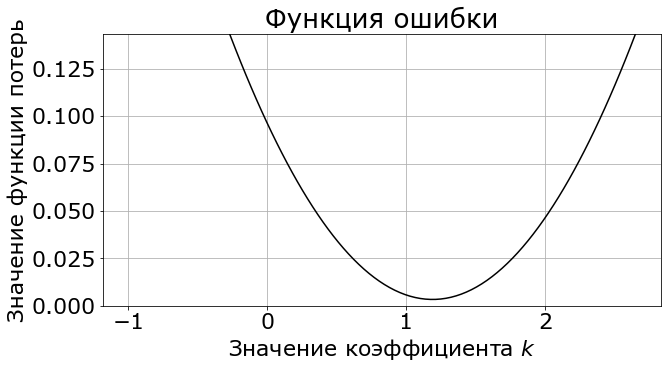

In [41]:
plot_all_J(X, y)

## Производная

Наша задачи - это минимизации функции ошибки. То есть, нужно найти такое $k$, для которого фунция $J(k)$ имеет минимальное значение.

Для того что бы это сделать придется немного потерпеть и вспомнить математику. 

Давайте повторим что такое *производная функции*.

Производная функции $f(x)$ записывается как $f'(x)$ или же как $\dfrac{d f(x)}{dx}$

Сама производная это то, насколько значение функции меняется в зависимости от изменения входного значения. 

В данном случае для какой-то точки $x_0$ производную можно рассматривать 

$f'(x_0) = \dfrac{d f(x_0)}{dx} $

$f'(x_0) = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

$\Delta x \rightarrow 0$

Посмотрим на функцию $f(x) = x^2 + 1.5$

In [42]:
x0 = 1.4
derivation(x0=x0)

interactive(children=(FloatSlider(value=-1.0, description='$\\Delta x$', max=1.5, min=-1.0, step=0.1001), Outp…

In [43]:
x0 = -1.3
derivation(x0=x0)

interactive(children=(FloatSlider(value=-1.0, description='$\\Delta x$', max=1.5, min=-1.0, step=0.1001), Outp…

Можно считать, что производная в точке показывает "скорость" изменения функции. Она положительна если функция растет и отрицательно, когда убывает.

Еще ее можно интерпретировать как угол наклона $\alpha$ касательной.

Обычно пишут что $f'(x) = tg(\alpha)$.

Рассмотрим повевдение производной в точках перегиба.

Точки перегиба - это, например, когда функция принимает максимальные и минимальные значения.

In [44]:
derivation(x0=0)

interactive(children=(FloatSlider(value=-1.0, description='$\\Delta x$', max=1.5, min=-1.0, step=0.1001), Outp…

Точках перегиба, производная равна 0. 

Расмотрим функцию и ее производную и получим ее аналитически.

В какой-то точке $x_0$ производная будет равна:

$f'(x_0) = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$


$f(x_0+\Delta x) = (x_0 + \Delta x)^2 + 1.5 = x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5$


$ \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x} = \dfrac{x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5 - (x_0^2 + 1.5) }{\Delta x} = \dfrac{2x_0\Delta x + \Delta x^2}{\Delta x}$


$\dfrac{2x_0\Delta x + \Delta x^2}{\Delta x} = 2x_0 + \Delta x$

И если мы будем счиать $\Delta x$ очень маленьким числом, тогда 

$f'(x_0) = 2x_0$

In [45]:
plot_simple_func_and_der(False)

interactive(children=(FloatSlider(value=2.0, description='$x$', max=2.0, min=-2.0), Output()), _dom_classes=('…

При взятии производной сложной функции использоваться chain rule:

**Chain рул нужно расписать до интуции**

$u = \phi(x)$

$y= f(u)$

$\frac{dy}{dx} = \frac{df(u)}{du} \cdot \frac{du(x)}{dx}$

Производная суммы/разности равна сумме/разности производных:

**Расписать все правила и добавить примеры произоводных для этих правил**

$(f_1(x) + f_2(x))' = f_1'(x) + f_2'(x)$

### Пример 1 ###

$y = sin(3x - 5)$

$u = 3x - 5$

$y = sin(u)$

$\frac{dy}{dx} = \frac{d sin(u)}{du} \cdot \frac{d(3x - 5)}{dx}$ 


$\frac{d sin(u)}{du} = cos(u)$

$\frac{d(3x - 5)}{dx} = 3$


$\frac{dy}{dx} = 3cos(3x - 5)$

### Пример 2 ###

$y = (10x^2 + x)^3$

$u = 10x^2 + x$

$y = u^3$

$\frac{dy}{dx} = \frac{d  u^3}{du} \cdot \frac{d(10x^2 + x)}{dx}$ 


$\frac{d  u^3}{du} = 3u^2$

$\frac{d(10x^2 + x)}{dx} = 20x + 1$

$\frac{dy}{dx} = 3u^2 \cdot(20x + 1) = 3(10x^2 + x)^2 \cdot(20x + 1) $

## Иcпользование производной для поиска минимума J

Рассмотрим как мы можем использовать производную для решения нашей задачи. 

*У нас есть функция ошибки $J(k)$. Нужно найти такое $k_m$, при котором $J(k_m)$ принимает минимальное значение.*

Я думаю, что вы знаете как можно найти значение минимума для данной функции. Нужно взять производную функции ошибки и приравнять ее к нулю. $J'(k) = \frac{dJ(k)}{dk} = 0$.

Таким образом, в нашем случае:

$ J'(k) = \dfrac{dJ(k)}{dk} = \dfrac{d(\dfrac{1}{N}\sum_{i=1}^{N}{(y_i - \widetilde{y}_i)^2})}{dk} $

$\dfrac{dJ(k)}{dk} = 2 \cdot \dfrac{1}{N}\sum_{i=1}^{N} (kX_i - y_i)\dfrac{d(kX_i - y_i)}{dk} $

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 
          
И для нахождения минимума нужно приравнять производную к нулю и решаем уравнение относительно k. 

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i = 0$

Решив уравнение, мы получим значение для $k=0.8257$

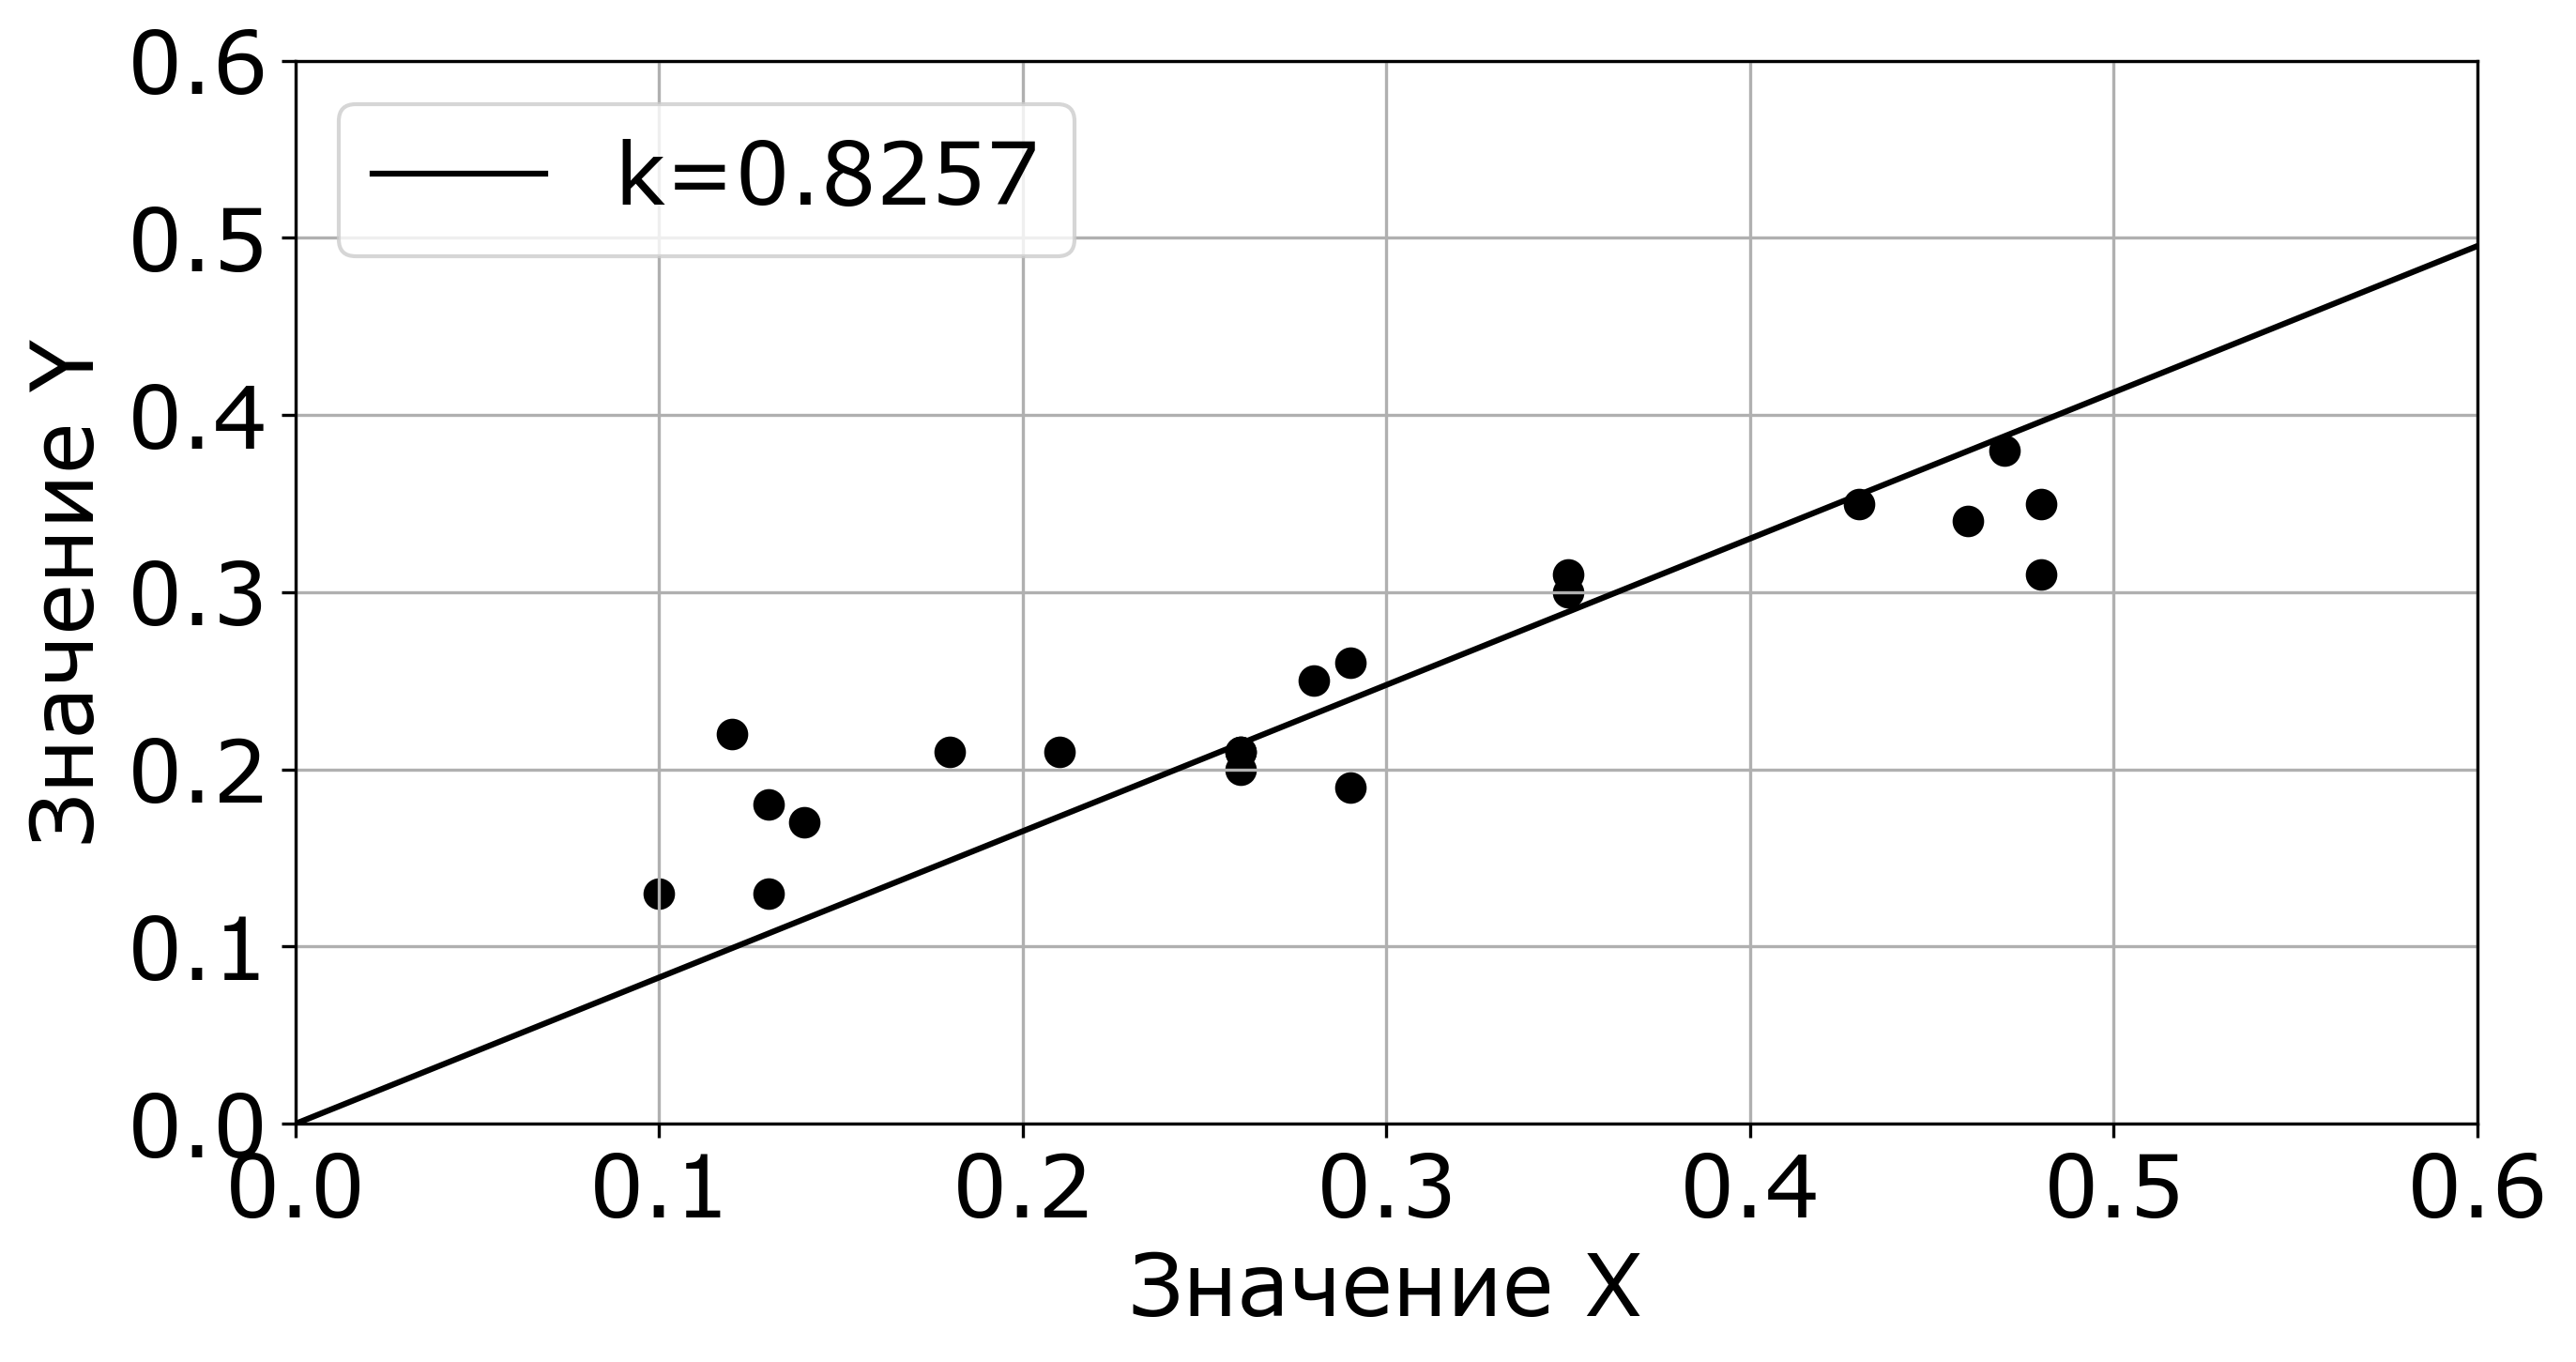

In [46]:
plot_data_and_hyp(X, y, 0.8257)

Но в реальных приложениях не всегда возможно решить это уравнение. 

Поэтому, познакомимся с таким алгоритмом как градиентный спуск. 

Данный алгоритм является одним самых распространенных алгоритмов в машинном обучении.

**Показать что производная слишком большая и нельзя так прыгать используя только ее** 

**Показать что чем больше ошибка, тем больше производная, для MSE**

In [47]:
plot_loss_and_der(X, y, same=True)

interactive(children=(FloatSlider(value=2.0, description='$k$', max=2.0, min=-2.0), Output()), _dom_classes=('…

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 

## Градиентный спуск

**переписать менее математично**

**объяснить альфу**

Как вызнаете, значение производной в точке равно значению тангенса угла наклона касательной в данной точке или же показывает растет ли функция или убывает.

Использую эту информацию мы можем понять где находится минимум и изменить значение $k$ в сторону минимума. 

* Если производная положительная, то нам нужно уменьшать значение $k$. 
* Если производная отрицательная, то нам нужно увеличить значение $k$.  

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Выбираем случайное значение для $k$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d}{dk} J(k)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$

Где $\alpha$ это коэффициент, который мы выбреем. 

In [48]:
def gradient_function(k, X, y):
    N = X.shape[0]       
    grad = 2*np.sum((k * X - y) * X) / N                       
    return grad   

k = 1
print(gradient_function(k, X, y))

0.0364


In [49]:
def gradient_descent(k_init, X, y, alpha, iters):
    k = k_init
    for i in range (0, iters):
        k = k - (alpha * gradient_function(k, X, y))
    return k

k_init = 1.0
alpha = 1
iters = 100
gradient_descent(k_init, X, y, alpha, iters)

0.8110955421579398

Аналитически подсчитаный k = 0.8257

Рассмотрим как ведет себя алгоритм с различными $\alpha$

In [50]:
interactive_gradient_descent(X, y)

interactive(children=(FloatSlider(value=0.1, description='$k$ init:', max=1.8, min=-0.1), FloatSlider(value=0.…

**Расказать про sklearn**

**Рассказать что есть из коробки. Но важно понимать инструмент.**

In [51]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression(fit_intercept=False)
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

lr.coef_

array([[0.81109554]])

# Немного усложним пример

В качестве гипотезы мы использовали функцияю вида $f(X) = kX$.

Многие из вас могли заметить, что это не совсем линейная функция. Линейная фунция на самом деле выглядит так:

$f(X) = kX + b$.

In [52]:
choose_slope_with_bias(X, y)

interactive(children=(FloatSlider(value=0.1, description='k', max=2.0), FloatSlider(value=0.1, description='b'…

Давайте изменим гипотезу и теперь будем использовать "настоящую" линейную функцию.

Но давайте немного изменим обозначения.

In [53]:
def f(X, k, b):
    return k*X + b

print(f(X=X, k=10, b=-10))

[-9.  -8.8 -8.7 -8.7 -8.6 -8.2 -7.9 -7.4 -7.4 -7.4 -7.2 -7.1 -7.1 -6.5
 -6.5 -5.7 -5.4 -5.3 -5.2 -5.2]


Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$. То есть, $\hat{y}$ является предсказанными нами значениями для $X$. 
А настоящие значения будут равны $y$. 

Тогда ошибка на одном примере равна $j(k, b)$ на i-ом примере будет равна $j(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$

$J(k, b) = \dfrac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $

То есть теперь у нас ошибка зависит не только от $k$, но и от $b$.

In [54]:
def linearn_loss_function(X, y, k, b):
    
    N = X.shape[0]       # получаем размер вектора столбца
    # или N = len(X)
   
    J = np.sum(((k*X + b) - y)**2)/N
    # или J = np.mean((k*X + b - y)**2)
    return J

k = 0
print(linearn_loss_function(X=X, y=y, k=k, b=10))

95.15566499999998


In [55]:
plot_linear_loss_in_3d(X, y)

interactive(children=(IntSlider(value=90, description='Вертикальное', max=90), IntSlider(value=90, description…

534


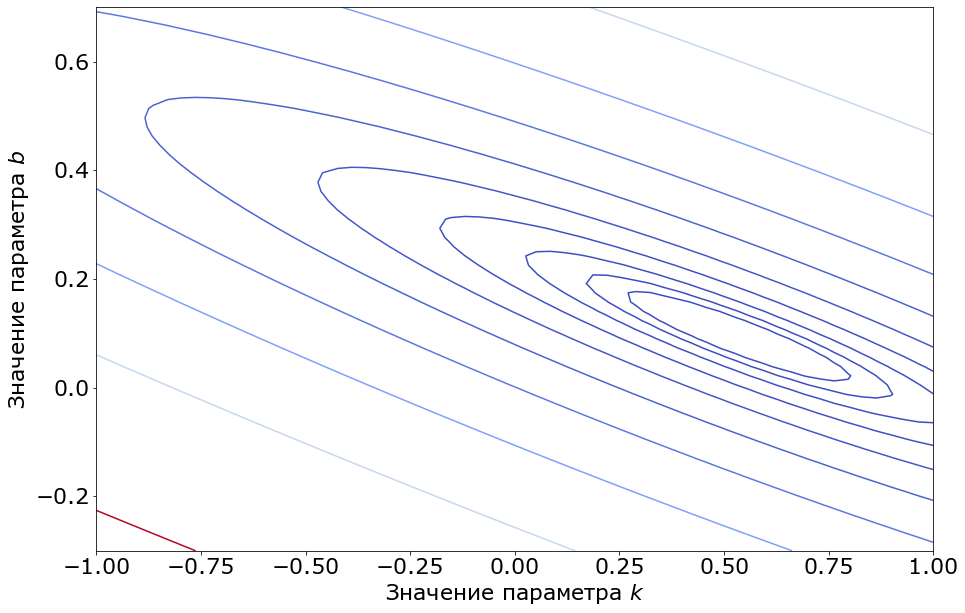

In [56]:
plot_linear_loss_in_3d_up(X, y)

## Градиент

**Пример градиента от функции двух переменых**

Давайте введем понятие градиента.

Градиент фунцкии $\phi(x_0, x_1, \ldots x_N)$ от N переменных это 

N значений: $\dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

По сути - это координаты вектора, со значениями производных по разным осям. 


$\phi(x, y) = z$ 

$grad (\phi) = \nabla \phi = \dfrac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \dfrac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$

$grad (\phi) = \nabla \phi = \{\dfrac{\delta \phi(x, y)}{\delta x}; \dfrac{\delta \phi(x, y)}{\delta y} \}$

$\phi(x, y) = (x + 1.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 2(x + 1.5) = 2x + 3$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

In [57]:
plot_func_in_3d()

interactive(children=(IntSlider(value=0, description='Вертикальное', max=90), IntSlider(value=0, description='…

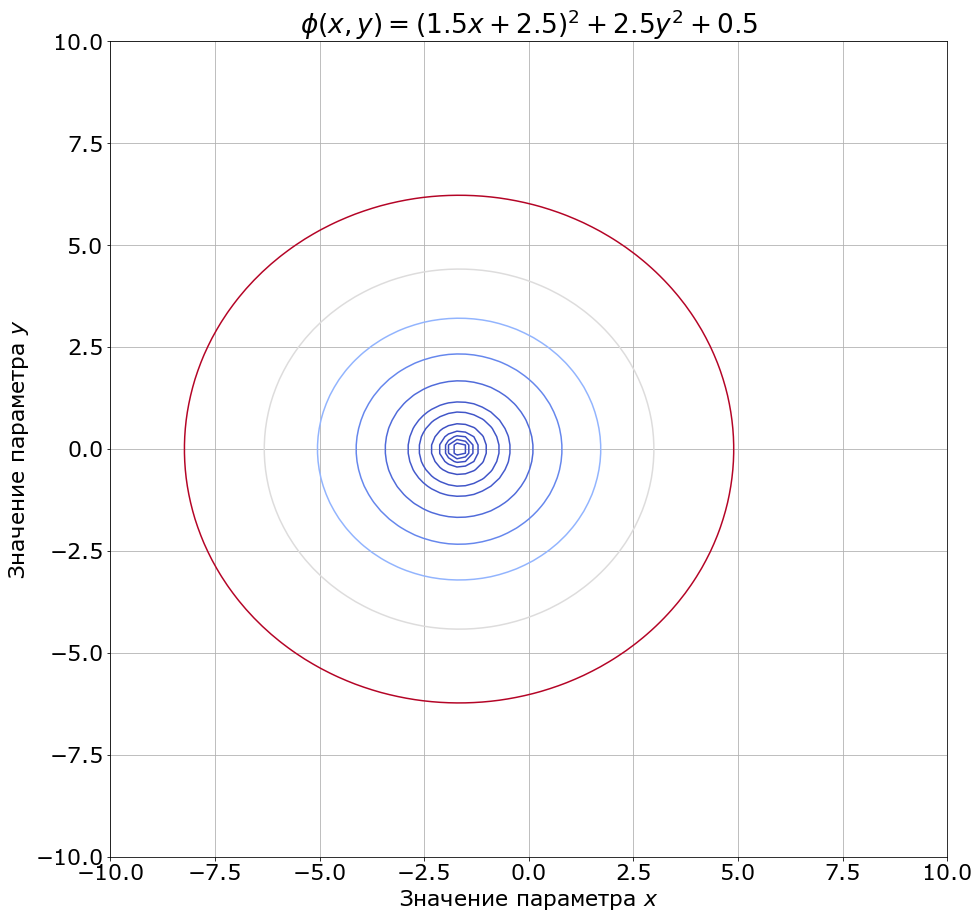

In [58]:
plot_3d_func_with_grad()

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 3(1.5x + 2.5) = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

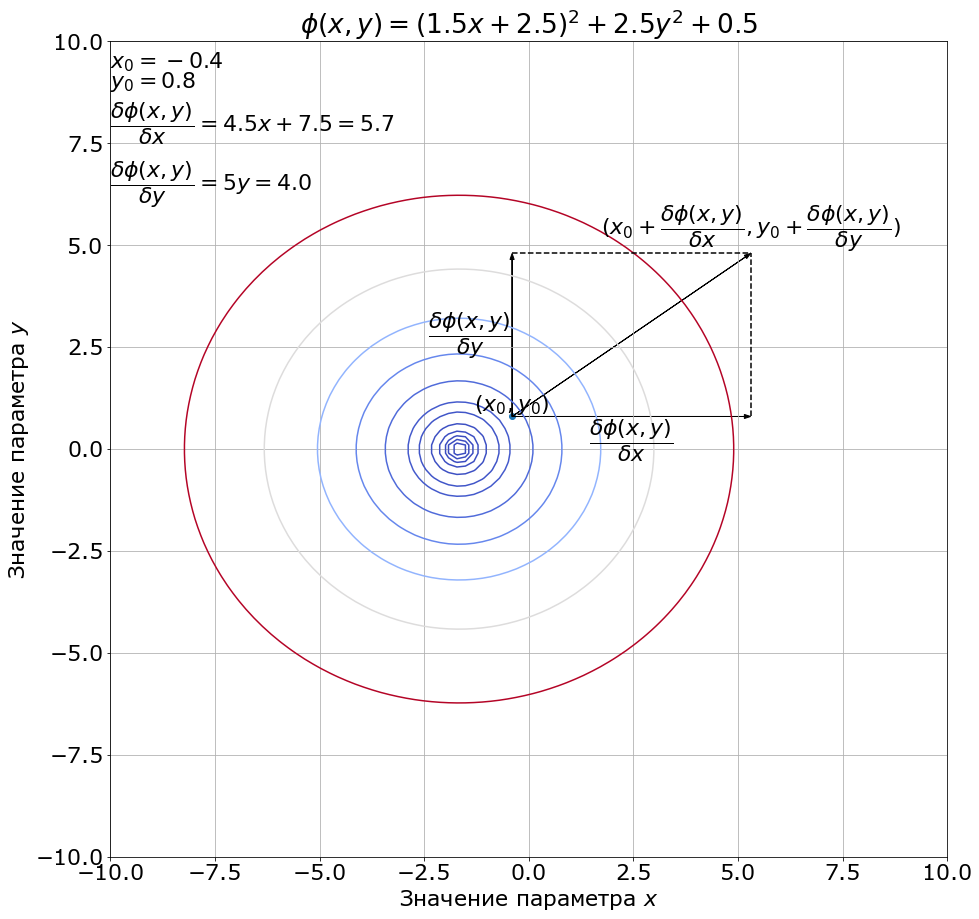

In [59]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='positive')

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 3(1.5x + 2.5) = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

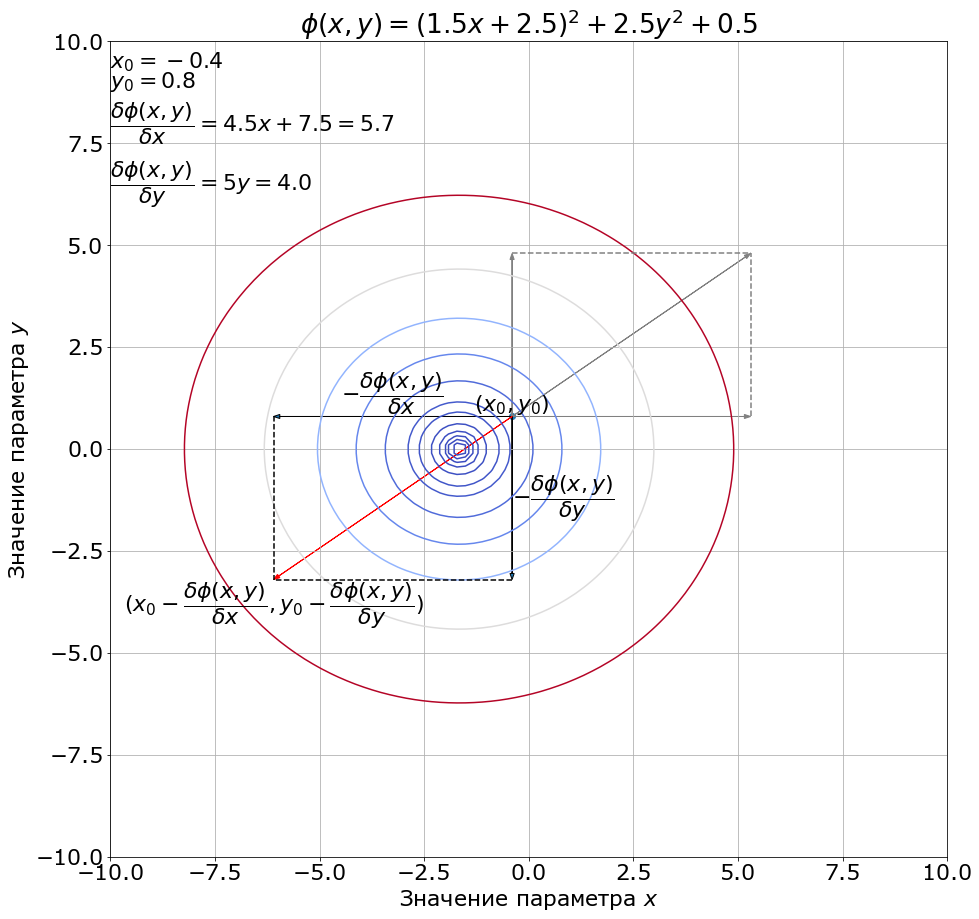

In [60]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='negative')

In [61]:
plot_3d_func_with_grad_interactive()

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

Тогда определим нашу функцию ошибки от параметров $k, b$:

$J(k, b) = \dfrac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

Для нахождения этих коэффициентов также используем градиентный спуск. Но теперь нам необходимо найти производную от функции ошибки для каждого параметра.

$\dfrac{\delta  J(k, b)}{\delta b} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\dfrac{\delta J(k, b)}{\delta k} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 

**Добавить ввход выход**

In [62]:
def gradient_function(k, b, X, y):
    N = X.shape[0]

    grad_b = 2*np.sum( ((k * X + b) - y)) / N                       
    grad_k = 2*np.sum( ((k * X + b) - y) * X) / N                       
    return np.array([grad_k, grad_b])

k = 5
b = 1
print(gradient_function(k, b, X, y))

[1.37416 4.344  ]


Тогда алгоритм градиентного спуска можно описать следующим образом:

* Выбираем случайное значение для $k$ и $b$
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta J(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta J(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

Где $\alpha$ это коэффициент, который мы выбираем. 

**Добавить ввход выход**

In [63]:
def gradient_descent(k_init, b_init, X, y, alpha, iters):
    k = k_init
    b = b_init
    for i in range (0, iters):
        gradients = gradient_function(k, b, X, y)
        k = k - (alpha * gradients[0])
        b = b - (alpha * gradients[1])
    
    return k, b


k_init = -5
b_init = 0
alpha = 0.75
iters = 250


k, b = gradient_descent(k_init, b_init, X, y, alpha, iters)
print(k, b)

0.5162151927235563 0.09923290617807613


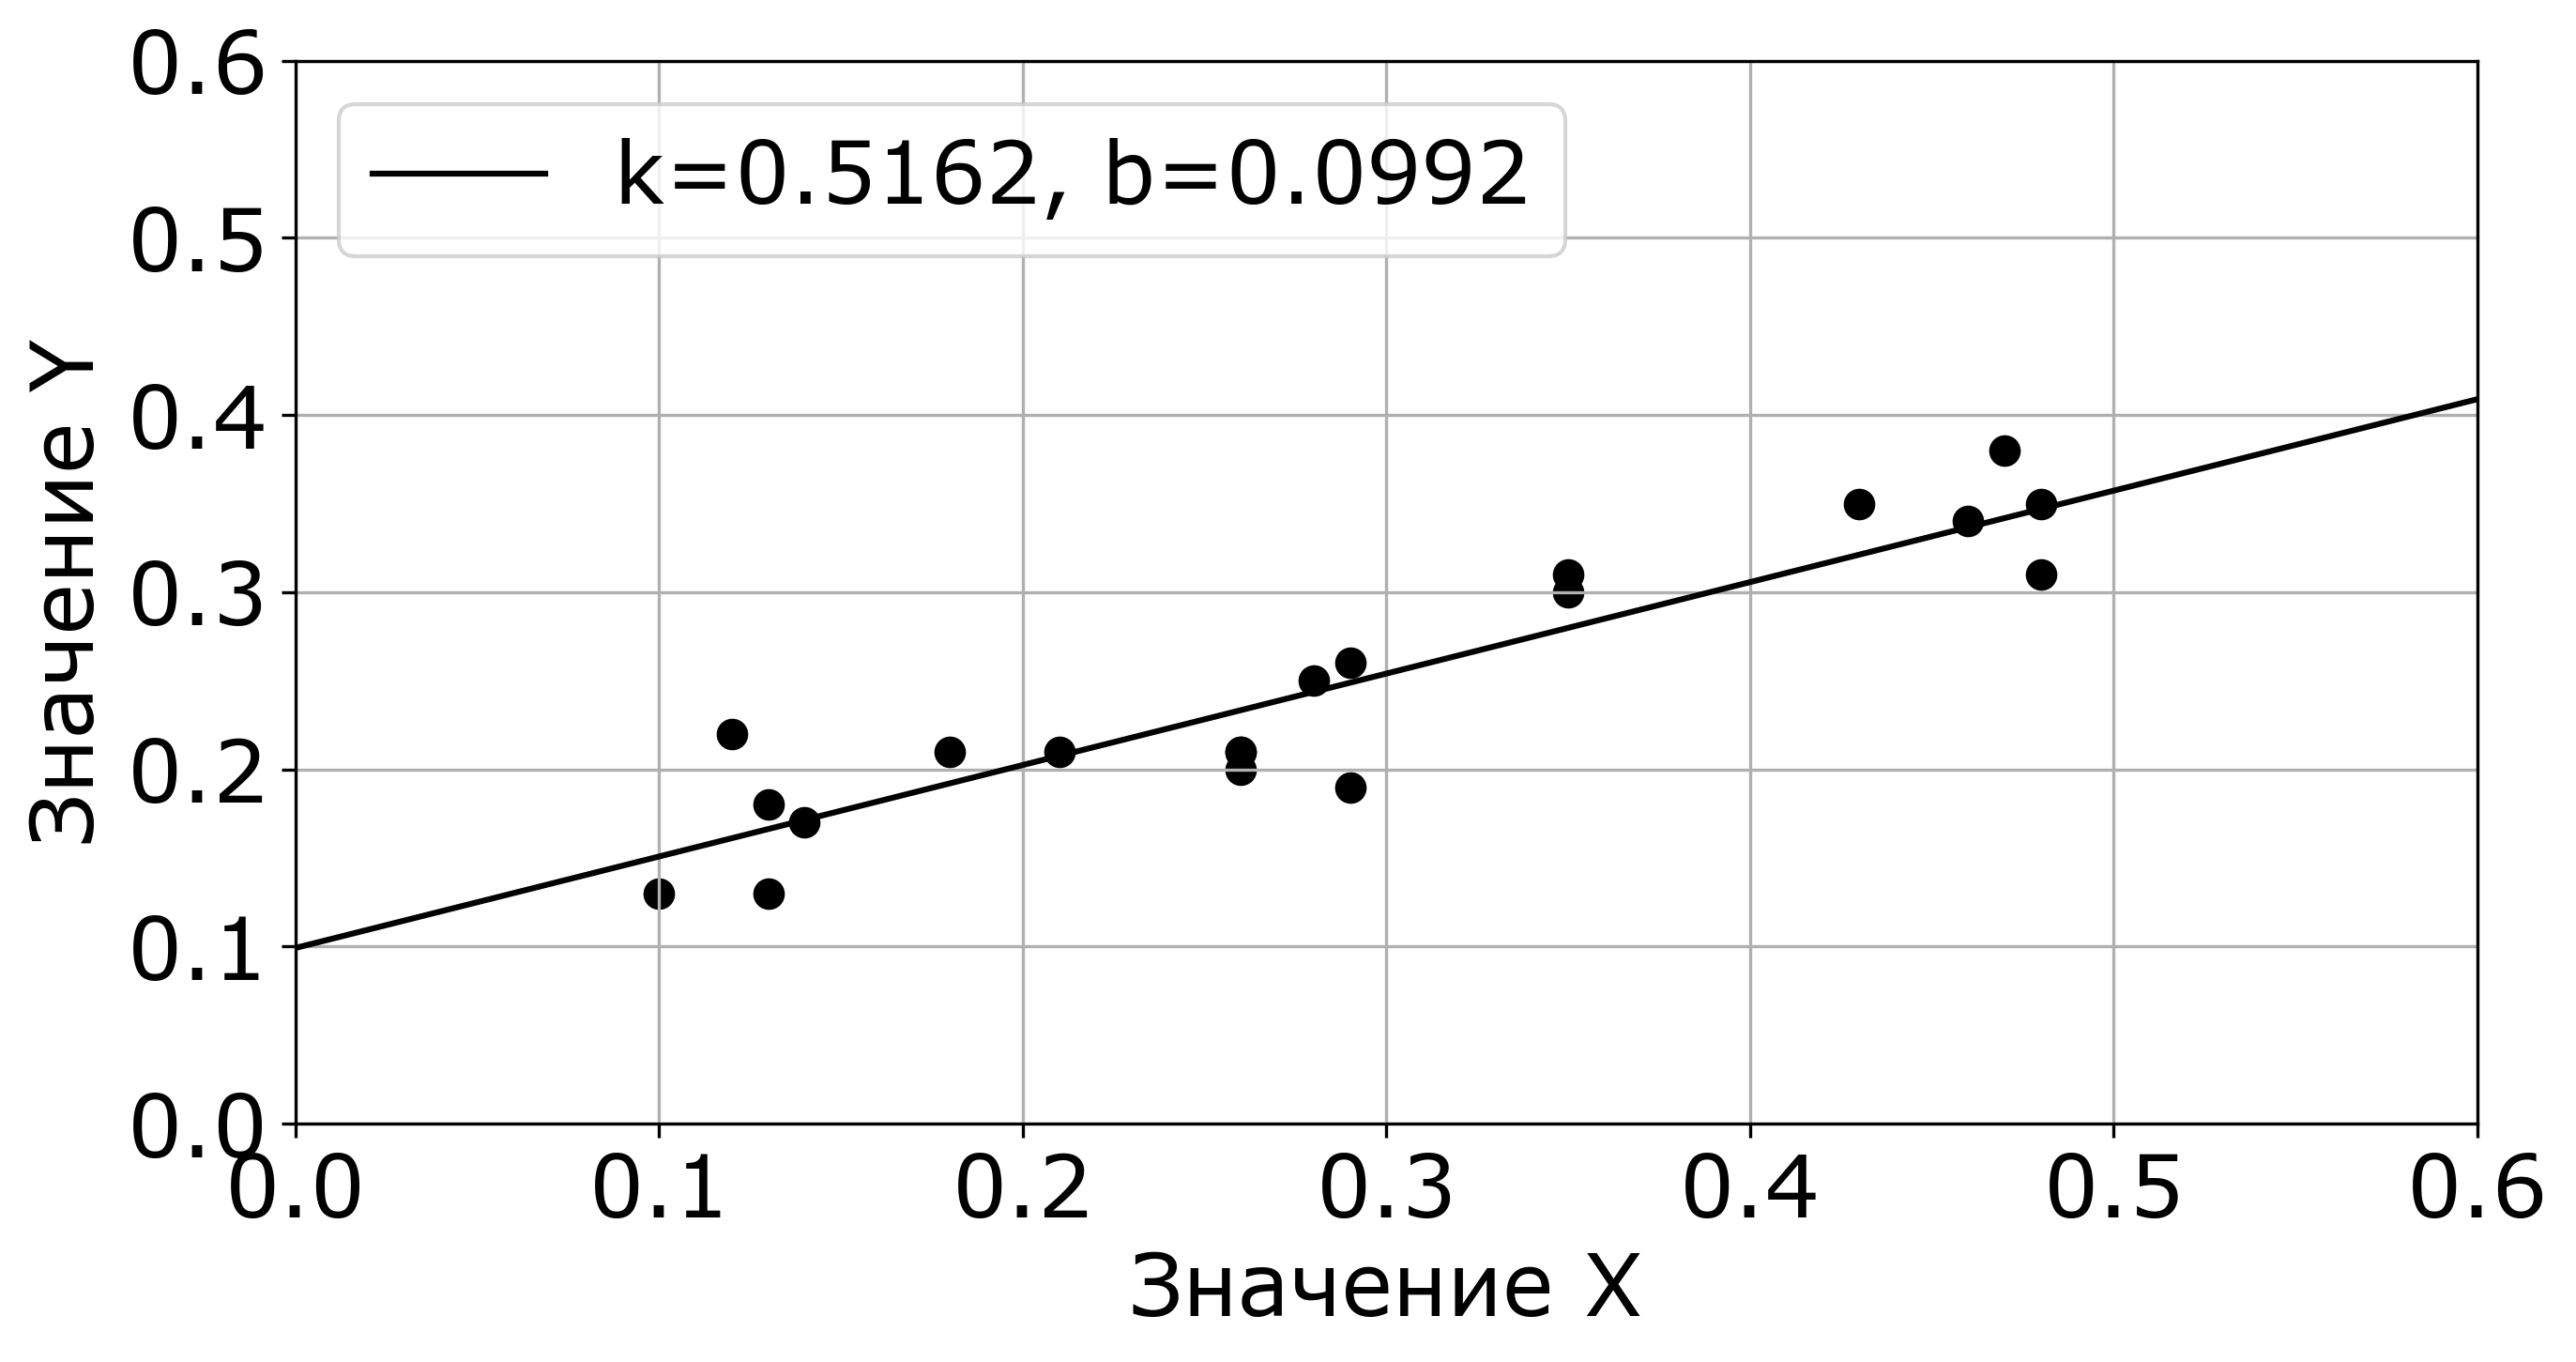

In [64]:
plot_data_and_hyp_with_bias(X, y, k, b)

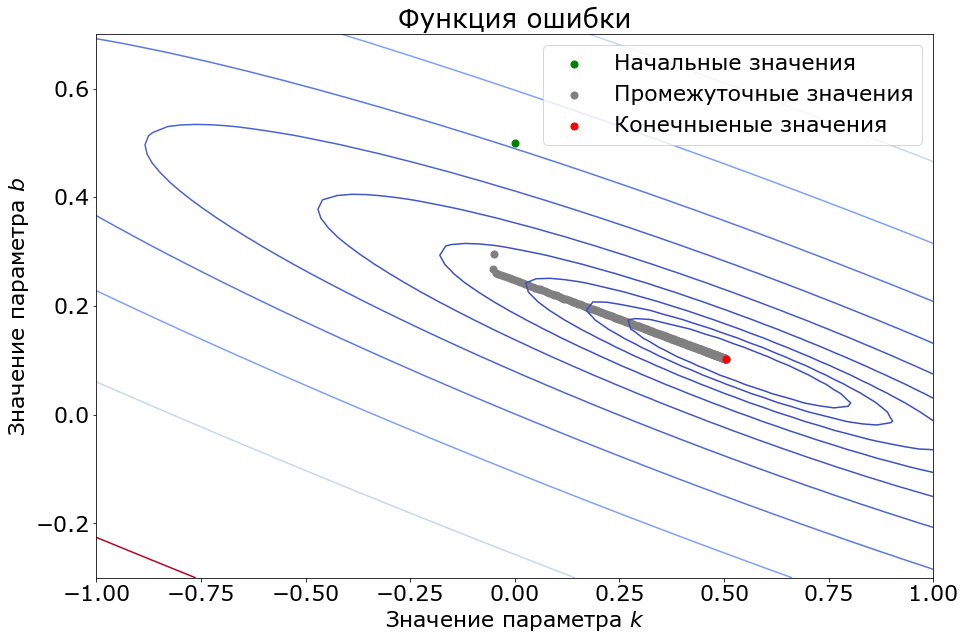

In [65]:
#alpha=0.75 № интересный случай
alpha=0.4
plot_gradient_descent_in_3d(X, y, iters=250, alpha=0.4)

In [66]:
plot_gradient_descent_in_3d_interactive(X, y, iters=200, alpha=0.75)

interactive(children=(IntSlider(value=-1, description='iter', max=200, min=-1), Output()), _dom_classes=('widg…